# <font color="blue">Project1: Virtual Makeup </font>
We have already seen interesting applications of facial features and landmarks such as aging, beardify, face swap etc.

In this project, you will build features for a Virtual Makeup application! Given below are a few features that are required to be built in the application. 

1. Apply Lipstick
1. Apply Blush
1. Apply Eye-Liners or Eye-Lashes
1. Apply Glasses
1. Apply Eye Color ( Lens Color)
1. Apply Hat/Cap
1. Apply Ear-Rings
1. Change Hair Color

### <font color="green">Your Task</font>
Implement any 2 features from the list above

We have provided a sample image. You can use your own image for experimentation as well as come up with other interesting features.

### <font color="green">Submission</font>
Once you are done, you have to create a video, explaining the main part of the code, upload it to youtube or any other video sharing service and provide the link in the form given in the submission section of the course.

### <font color="green">Marks Distribution</font>

1. Feature 1: 35 marks
1. Video for Feature 1: 15 marks
1. Feature 2: 35 marks
1. Video for Feature 2: 15 marks

In [164]:
import cv2,sys,dlib,time,math
import numpy as np
import matplotlib.pyplot as plt
import os # relative path reading
%matplotlib inline

In [165]:
# for google drive ipynb
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [166]:
# set the directory path to the project folder
path = '/content/gdrive/My Drive/OpenCV/Course 2/project1-virtual-makeup'
os.chdir(path)
print(os.getcwd())

/content/gdrive/My Drive/OpenCV/Course 2/project1-virtual-makeup


Load faceBlendCommon file to use common functions.

In [167]:
# load the faceBlendCommon script
import faceBlendCommon as fbc

In [168]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0,8.0)
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'bilinear'

# <font color="blue">Load landmark detector</font>
We have provided code for loading the model for landmark detector.

Load the given 68 point landmark detector

In [169]:
# Landmark model location
PREDICTOR_PATH =  "shape_predictor_68_face_landmarks.dat"

# Get the face detector
faceDetector = dlib.get_frontal_face_detector()
# The landmark detector is implemented in the shape_predictor class
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

# <font color="blue">Read Image</font>
We load the image and convert it to RGB format so that it can be used by Dlib and also for displaying using matplotlib.

### <font color="red">You can also use any other image.</font> 

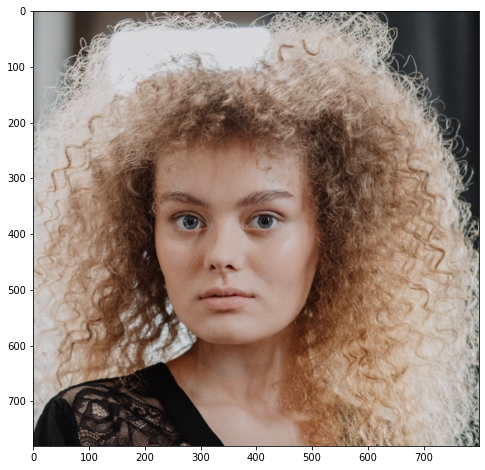

In [170]:
no_makeup = cv2.imread("girl-no-makeup.jpg")

imDlib = cv2.cvtColor(no_makeup,cv2.COLOR_BGR2RGB)
plt.imshow(imDlib)

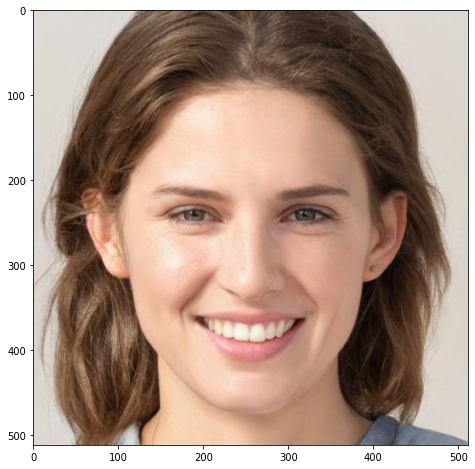

In [171]:
# For reference, I'll be using two images
lipstick = cv2.imread("girl-no-makeup-2.jpg")

imDlib2 = cv2.cvtColor(lipstick,cv2.COLOR_BGR2RGB)
plt.imshow(imDlib2)

# <font color="blue">Calculate Landmarks</font>
We are providing code for calculating the landmarks in this section. So that you can focus on the feature implementation.

In [172]:
# points = fbc.getLandmarks(faceDetector, landmarkDetector, imDlib)
# print(points)

# <font color="blue">TODO</font>
Implementation of 2 features: 


Below code is used as a visual indicator for which points belong to which facial feature


[(100, 223), (105, 266), (113, 307), (120, 347), (133, 384), (156, 417), (186, 444), (219, 468), (254, 477), (292, 470), (324, 447), (351, 418), (373, 385), (384, 348), (389, 309), (397, 268), (401, 227), (131, 217), (154, 206), (181, 206), (207, 211), (232, 221), (283, 220), (306, 211), (330, 205), (356, 206), (376, 219), (258, 242), (257, 270), (257, 298), (256, 326), (227, 332), (241, 338), (256, 344), (271, 339), (285, 334), (166, 242), (183, 236), (201, 237), (217, 248), (199, 247), (182, 247), (293, 247), (310, 237), (327, 236), (345, 243), (329, 247), (312, 248), (186, 362), (211, 356), (237, 355), (256, 359), (274, 356), (298, 357), (322, 363), (300, 397), (274, 411), (255, 413), (235, 410), (210, 393), (194, 365), (237, 367), (255, 369), (273, 368), (315, 366), (274, 391), (255, 393), (236, 390)]


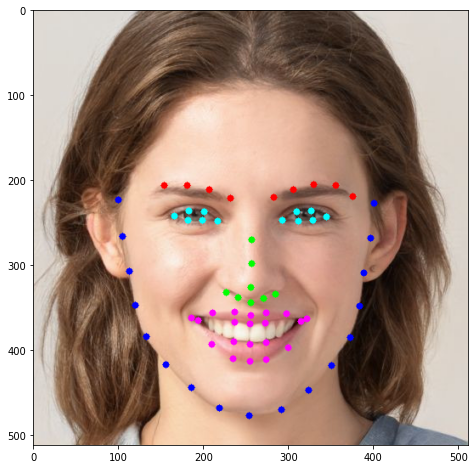

In [173]:
choice = imDlib2
imcopy = choice.copy()

points = fbc.getLandmarks(faceDetector, landmarkDetector, choice)
print(points)

# feature point reveal as a visual reference
for p in points[0:17]:
  # Jaw points
  cv2.circle(imcopy, p, 4, (0,0,255), thickness=-1)
for p in points[18:27]:
  # eyebrows points
  cv2.circle(imcopy, p, 4, (255,0,0), thickness=-1)
for p in points[28:36]:
  # nose points
  cv2.circle(imcopy, p, 4, (0,255,0), thickness=-1)
for p in points[36:48]:
  # eyes points
  cv2.circle(imcopy, p, 4, (0,255,255), thickness=-1)
for p in points[48:]:
  # lips points
  cv2.circle(imcopy, p, 4, (255,0,255), thickness=-1)
plt.imshow(imcopy)

# <font color="blue">Feature 1: Lip Change</font>
Write code for the first feature you want to implement from the above list. Display the output image after writing the code.

# Choose a color and Image

In [230]:
# Change this color to change lipstick color!
color = (75, 125, 175)

# Change the Choice of image here
choice = imDlib2
imcopy = choice.copy()

points = fbc.getLandmarks(faceDetector, landmarkDetector, choice)

Reference landmarks

![](https://www.researchgate.net/publication/327500528/figure/fig9/AS:668192443748352@1536320901358/The-ibug-68-facial-landmark-points-mark-up.ppm)

In [231]:
# Get points of the lips

# I will be using cv2.pollyFill to build the mask, polyfill takes in vectorized set of points
# this means a line will be drawn between point[0] -> point[1] -> point[2] -> ... -> point[N] -> point[0] and subsequently filled

# So this means how upperlips and lowerlips are ordered MATTERS or else the mask will be drawn incorrectly
upperlips = points[48:55] + points[60:65][::-1]
lowerlips = points[48:49] + points[54:60][::-1] + points[64:]

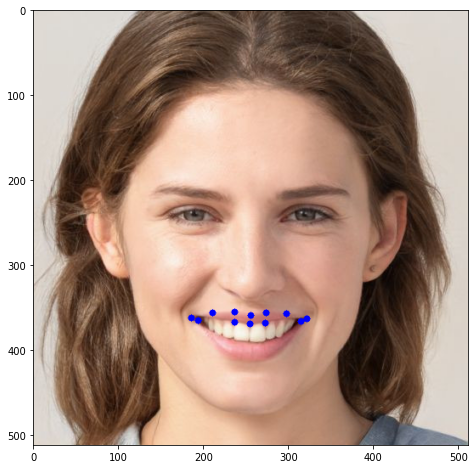

In [232]:
# visualize the points
imcopy = choice.copy()
imcopy2 = choice.copy()

for p in upperlips:
  cv2.circle(imcopy, p, 4, (0,0,255), thickness=-1)

plt.imshow(imcopy)

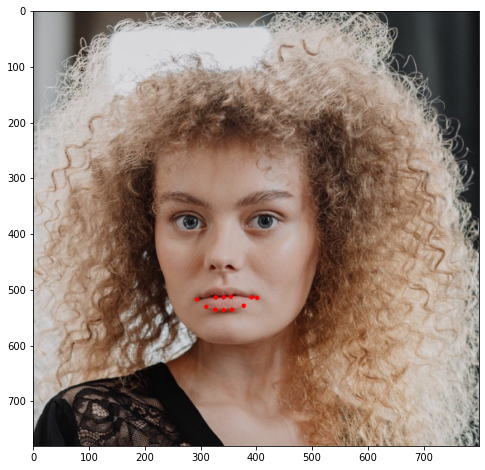

In [177]:
for p in lowerlips:
    cv2.circle(imcopy2, p, 4, (255,0,0), thickness=-1)
plt.imshow(imcopy2)

# Creating the lips mask

In [178]:
# Version 2 of lip mask

# cv2.pollyFill wants np.arrays to be passed to it. Currently upperlips and lowerlips are a list(tuples)

# They need to be converted from list(tuples) to list(list(int))

print('Original list of tuples')
print(upperlips)
print('\n')

uHull = [[p[0],p[1]] for p in upperlips]
# for p in upperlips:
#   uHull.append([p[0], p[1]])
lHull = [[p[0],p[1]] for p in lowerlips]
# for p in lowerlips:
#   lHull.append([p[0], p[1]])

print('Converted into list of lists')
print(uHull)
print('\n')

uHull = np.array(uHull)
lHull = np.array(lHull)

print('Converted into numpy arrays')
print(uHull)
print('\n')

Original list of tuples
[(293, 517), (310, 503), (327, 496), (340, 500), (353, 496), (376, 502), (401, 514), (391, 513), (354, 511), (340, 512), (327, 512), (303, 516)]


Converted into list of lists
[[293, 517], [310, 503], [327, 496], [340, 500], [353, 496], [376, 502], [401, 514], [391, 513], [354, 511], [340, 512], [327, 512], [303, 516]]


Converted into numpy arrays
[[293 517]
 [310 503]
 [327 496]
 [340 500]
 [353 496]
 [376 502]
 [401 514]
 [391 513]
 [354 511]
 [340 512]
 [327 512]
 [303 516]]




In [179]:
# We build the mask for the lips
mask = np.zeros(choice.shape, dtype=choice.dtype)

cv2.fillPoly(mask, [uHull], (255,255,255));
cv2.fillPoly(mask, [lHull], (255,255,255));

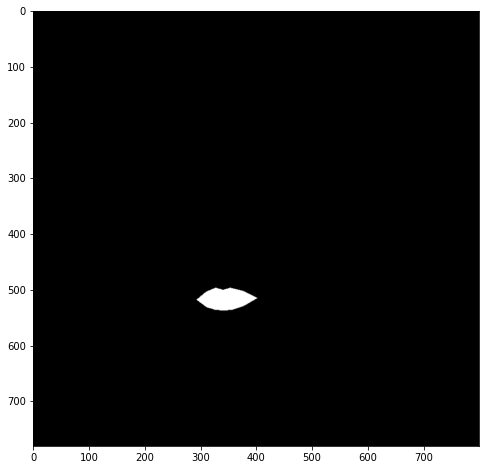

In [180]:
plt.imshow(mask)

In [181]:
# Find bounding box for mask preview
lst = upperlips + lowerlips
xmin, xmax = min(lst, key = lambda i : i[1])[1], max(lst, key = lambda i : i[1])[1]
ymin, ymax = min(lst, key = lambda i : i[0])[0], max(lst, key = lambda i : i[0])[0]

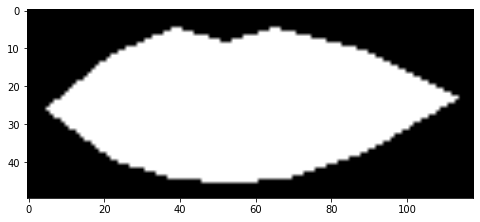

In [182]:
# Up-close view of the mask
plt.imshow(mask[xmin - 5:xmax + 5, ymin - 5:ymax + 5, : ])

In [183]:
# Show lipstick preview
lipstick = np.zeros(choice.shape, dtype=choice.dtype)
cv2.fillPoly(lipstick, [uHull], color);
cv2.fillPoly(lipstick, [lHull], color);

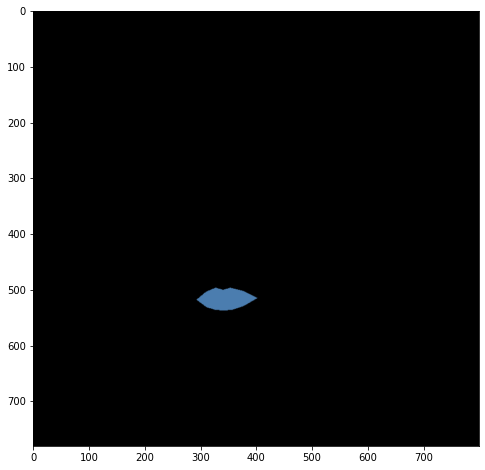

In [184]:
plt.imshow(lipstick)

In [185]:
# mask a mask copy and experiment with the copy
maskcopy = mask.copy()

# unint8 to bool mask conversion
maskcopy = maskcopy//255
maskcopy = maskcopy.astype(np.bool)
print(maskcopy.shape)

(780, 799, 3)


In [186]:
# Now that the mask is complete, only that color swap is needed to be done.
# To change the color of the lips from one color to another color while keeping the luminance and saturation.
# you have to convert from the RGB color space to HLS color space.

# The hue is swapped from the original image's hue to the lipstick's hue
# and converted back from HLS to RGB for the final result

colored = lipstick

# Convert lipstick from RGB to HLS
colored_hsv = cv2.cvtColor(colored,cv2.COLOR_RGB2HLS)

In [187]:
out = choice.copy()

# Convert image of person from RGB to HLS
outhsv = cv2.cvtColor(out,cv2.COLOR_RGB2HLS)
channel = 0

# extract the hue channel
ohchannel, chchannel, maskchannel = outhsv[:,:,channel], colored_hsv[:,:,channel], maskcopy[:,:,channel]

# swap the image's hue to the lipstick's hue
ohchannel[maskchannel] = chchannel[maskchannel]

# Because the hue channel is just a slice of the HLS image, the changes to the slice affect the HLS image
# Convert from HLS to RGB
out = cv2.cvtColor(outhsv,cv2.COLOR_HLS2RGB)

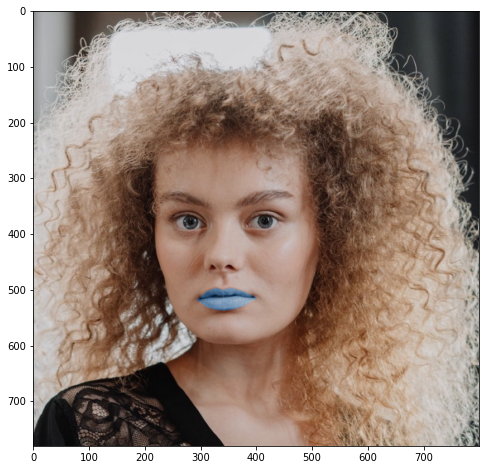

In [188]:
plt.imshow(out)

In [189]:
plt.imsave('girl-no-makeup-'+'lip-color-change.png', out)

# <font color="blue">Feature 2</font>
Write code for the second feature you want to implement from the above list. Display the output image after writing the code.

In [134]:
# !pip uninstall keras
# !pip install keras
# !pip uninstall tensorflow
# !pip install tensorflow

In [233]:
import glob
import time
import keras

# Helper Method

In [234]:
# Modified code taken from author
def predict(image, height=224, width=224):
    # im = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    im = image.copy()
    im = im / 255
    im = cv2.resize(im, (height, width))
    im = im.reshape((1,) + im.shape)
    
    pred = model.predict(im)
    mask = pred.copy()
    mask = mask.reshape((224, 224,1))
    row, col, _ = image.shape
    mask = cv2.resize(mask, (col, row))
    return mask

Using a convolutional network to predict the hairmask model

In [137]:
# load hair detection model
# model source https://github.com/thangtran480/hair-segmentation/releases
model = keras.models.load_model('./models/hairnet_matting.hdf5')

In [235]:
img = choice.copy()

# Predict the mask from the image
hairmask = predict(img)

Create the mask from the predicted model. The mask goes through some conversions so that it matches the image's dimensions

In [236]:
## The next few steps reshapes the predicted mask to a 3 dimensional image
print("Original shape")
print(img.shape)

print("predicted mask shape")
print(hairmask.shape)



# # add a new dimensions to the original mask
# reshaped_hairmask = hairmask[:,:,np.newaxis]

# print("mask additiona new dimension")
# print(reshaped_hairmask.shape)


# row, col, _ = reshaped_hairmask.shape
# reshaped_hairmask = reshaped_hairmask.repeat(3, axis = 2)
# print("final mask shape")
# print(reshaped_hairmask.shape)

Original shape
(512, 512, 3)
predicted mask shape
(512, 512)


Mask Preview

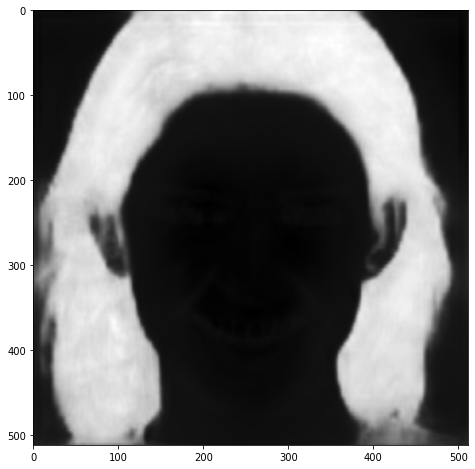

In [237]:
plt.imshow(hairmask)

(512, 512)


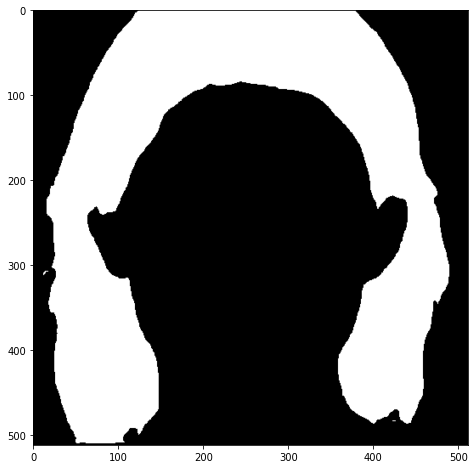

In [238]:
# Mask Creation
threshold = 0.7
bit8_hairmask = hairmask.copy()

# Convert the float hairmask into uint8 values
bit8_hairmask[bit8_hairmask > threshold] = 255
bit8_hairmask[bit8_hairmask <= threshold] = 0

# convert unint8 mask to a boolean mask
bin_hairmask = bit8_hairmask.astype(np.bool)
print(bin_hairmask.shape)
plt.imshow(bin_hairmask)

In [239]:
# Convert the 8bit mask into a 3 dimensional image with a hue swap
rgb_mask = bit8_hairmask.copy()

# add new dimension
rgb_mask = rgb_mask.astype(np.uint8)
rgb_mask = rgb_mask[:,:,np.newaxis]
print(rgb_mask.shape)

# repeat the dimension in the 3rd axis
rgb_mask = rgb_mask.repeat(3, axis = 2)

print(rgb_mask.shape)

(512, 512, 1)
(512, 512, 3)


In [240]:
# break the color into its numerical components
r, g, b = color

# Set the r g b channels to their set
rgb_mask[:,:,0][bin_hairmask] = r
rgb_mask[:,:,1][bin_hairmask] = g
rgb_mask[:,:,2][bin_hairmask] = b

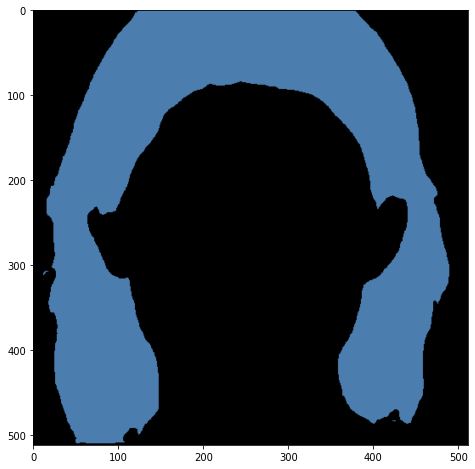

In [241]:
plt.imshow(rgb_mask)

In [242]:
# RGB to HLS Conversion
hls_mask = cv2.cvtColor(rgb_mask, cv2.COLOR_RGB2HLS)
hls_img = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
channel = 0

h_mask, h_img = hls_mask[:,:, channel], hls_img[:,:, channel]

h_img[bin_hairmask] = h_mask[bin_hairmask]

rgb_img = cv2.cvtColor(hls_img, cv2.COLOR_HLS2RGB)

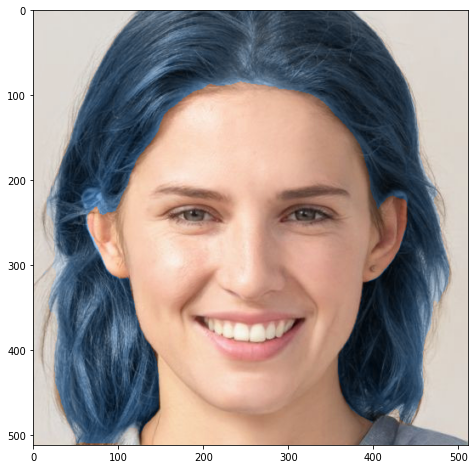

In [243]:
plt.imshow(rgb_img)

In [244]:
plt.imsave('girl-no-makeup-2'+'hair-color-change.png', rgb_img)